In [31]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score

In [21]:
# Load the dataset
df = pd.read_csv('housing.csv')

# Inspect the first few rows of the dataset
print(df.head())

# Check for missing values in the dataset
print(df.isnull().sum())

# Fill with 0(total_bedrooms)
df['total_bedrooms'] = df['total_bedrooms'].fillna(0)
print(df.isnull().sum())

# Select the feature and the target variable
X = df[['median_income', 'total_rooms', 'total_bedrooms', 'population', 'households','longitude', 'latitude', 'ocean_proximity']].copy()
y = df['median_house_value']
y = np.log(y)  # Apply log transformation to the target variable

# Create interaction features
# Create interaction features (Fix the warning with .loc)
X.loc[:, 'rooms_per_person'] = X['total_rooms'] / X['population']
X.loc[:, 'bedrooms_per_room'] = X['total_bedrooms'] / X['total_rooms']

# One-hot encode the 'ocean_proximity' column
df = pd.get_dummies(df, columns=['ocean_proximity'], drop_first=True)
X = pd.get_dummies(X, columns=['ocean_proximity'], drop_first=True)

# Feature scaling (Standardization)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)  # Scale the features

   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.23     37.88                41.0        880.0           129.0   
1    -122.22     37.86                21.0       7099.0          1106.0   
2    -122.24     37.85                52.0       1467.0           190.0   
3    -122.25     37.85                52.0       1274.0           235.0   
4    -122.25     37.85                52.0       1627.0           280.0   

   population  households  median_income  median_house_value ocean_proximity  
0       322.0       126.0         8.3252            452600.0        NEAR BAY  
1      2401.0      1138.0         8.3014            358500.0        NEAR BAY  
2       496.0       177.0         7.2574            352100.0        NEAR BAY  
3       558.0       219.0         5.6431            341300.0        NEAR BAY  
4       565.0       259.0         3.8462            342200.0        NEAR BAY  
longitude               0
latitude                0
housing_median_age     

In [23]:
# Split the data into training (80%) and testing (20%) sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
# Initialize the linear regression model
model = LinearRegression()

# Train the model on the training data
model.fit(X_train, y_train)


LinearRegression()

In [27]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [29]:
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Calculate R-squared (R²)
r2 = r2_score(y_test, y_pred)
print(f'R-squared: {r2}')

Mean Squared Error: 0.11143179878253967
R-squared: 0.6566743162815937


In [33]:
# Cross-validation to check the generalization
cv_scores = cross_val_score(model, X_scaled, y, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-validated MSE: {-cv_scores.mean()}")

Cross-validated MSE: 0.12796050577150758


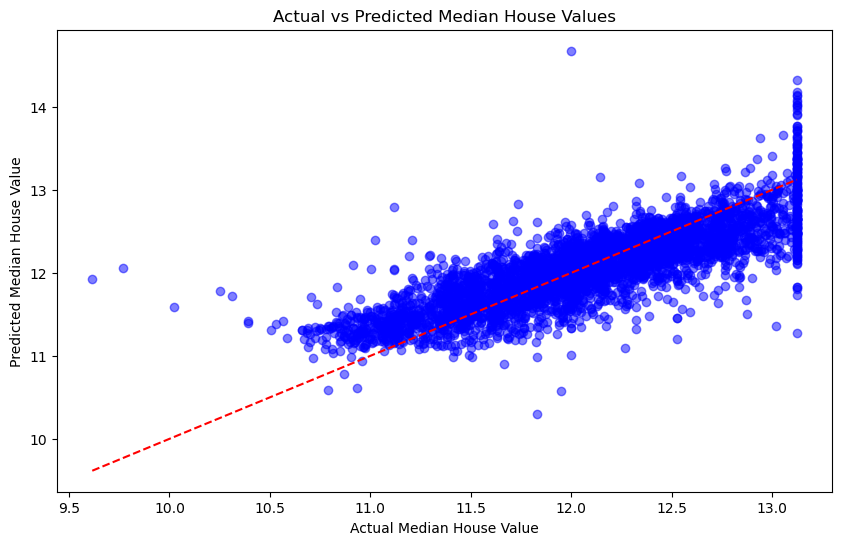

In [35]:
# Plot actual vs predicted values for the test set
plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')
plt.title('Actual vs Predicted Median House Values')
plt.xlabel('Actual Median House Value')
plt.ylabel('Predicted Median House Value')
plt.show()

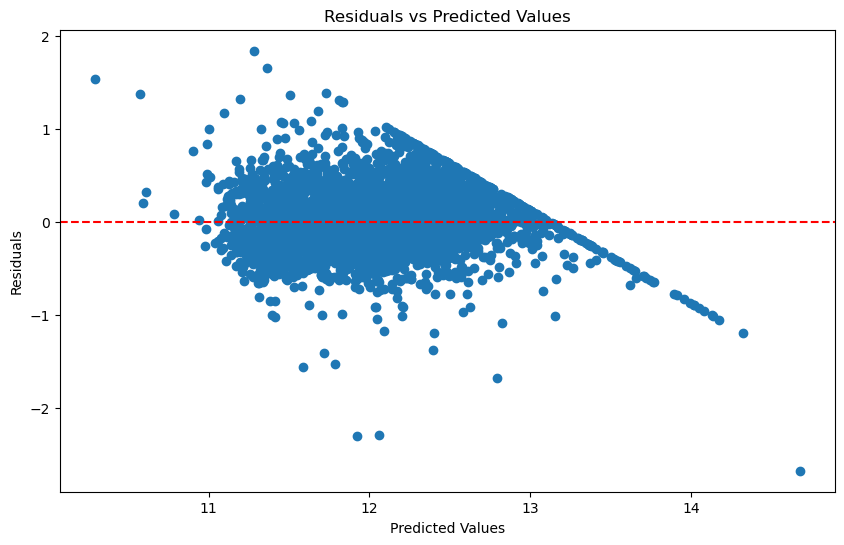

In [37]:
# Visualize the residuals
residuals = y_test - y_pred
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals)
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Values')
plt.show()